In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
from datetime import datetime
import random
import os

In [11]:
def add_random_straight_lines(image, height, width):
    num_lines = np.random.randint(1, 5)
    y0 = int(height/num_lines)
    for i in range(num_lines):
        line_thickness = np.random.randint(1, 5)
        x1, x2 = 0, width
        y = y0*(i+1) + np.random.randint(-0.05*height, 0.05*height)
        image = cv2.line(image, (x1, y), (x2, y), (130, 130, 130), thickness=line_thickness)
        prev_y = y
    return image

In [32]:
def add_random_text(image, height, width):
    closings = ['Sincerly', 'Regards', 'Cordially', 'Yours trulyt']
    bottom_text = ['Amal Joseph', 'Steve Jobs', 'Larry Page', 'Paul Walker']

    font = [cv2.FONT_HERSHEY_DUPLEX, cv2.FONT_HERSHEY_COMPLEX, cv2.FONT_HERSHEY_TRIPLEX]
    y = np.random.randint(0.75*height, 1.02*height)
    x = np.random.randint(0.0005*width, 0.3*width)
    fontScale = np.random.random() + 0.7
    thickness = np.random.randint(1, 3)
    image = cv2.putText(image, np.random.choice(bottom_text), (x, y), np.random.choice(font), fontScale, (0, 0, 0), thickness, cv2.LINE_AA)
    return image
    

In [33]:
def process_image(image_path):
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    image = add_random_text(image, height, width)
    image = add_random_straight_lines(image, height, width)

    return np.array(image)

Imagem de exemplo com e sem ruído:


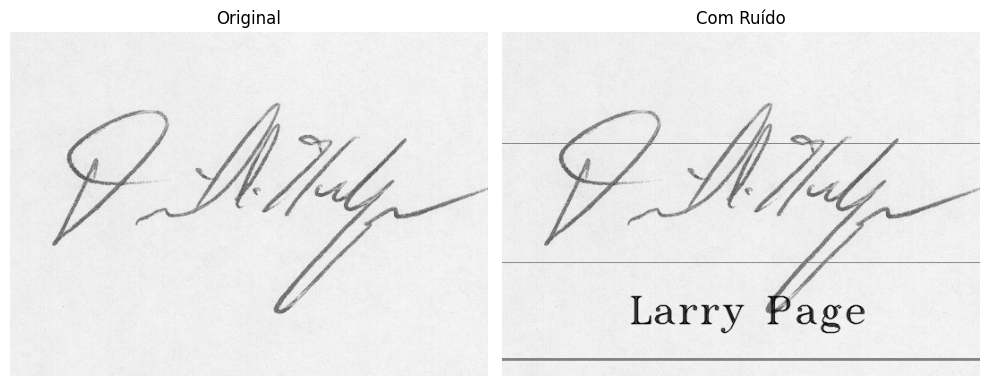

In [38]:
import matplotlib.pyplot as plt

cont = 0
for file in os.listdir('../dados/full_org'):
    if file.endswith('.png'):
        full_path = os.path.join(os.path.dirname(os.getcwd()), 'dados', 'full_org', file)

        # Lê imagem original
        original = cv2.imread(full_path)
        original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # Converte para RGB

        # Processa com ruído
        processada = process_image(full_path)
        processada_rgb = cv2.cvtColor(processada, cv2.COLOR_BGR2RGB)

        if cont == 0:
            print('Imagem de exemplo com e sem ruído:')
            plt.figure(figsize=(10, 5))

            plt.subplot(1, 2, 1)
            plt.imshow(original_rgb)
            plt.title('Original')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(processada_rgb)
            plt.title('Com Ruído')
            plt.axis('off')

            plt.tight_layout()
            plt.show()

        cont += 1
        cv2.imwrite(f'../dados/noisy/noisy_{cont}.png', processada)
    